In [145]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Problem Statement

Principal Component Analysis

In [110]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.decomposition import PCA
from scipy.stats import zscore


## Q1. Load the Data file into Python DataFrame and view top 10 rows

In [111]:
Cancer = pd.read_csv("breast-cancer-wisconsin-data.csv")

## Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [103]:
Cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [112]:
Cancer1 = Cancer.replace("?",1) ## replaced "?" with "mode"
Cancer1.iloc[:,6:7] = Cancer1.iloc[:,6:7].astype(int)


In [113]:
Cancer1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null int32
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int32(1), int64(10)
memory usage: 57.4 KB


In [114]:
Cancer1.shape

(699, 11)

In [115]:
Cancer1.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Bare Nuclei,699.0,3.486409e+00,3.621929,1.0,1.0,1.0,5.0,10.0
Normal Nucleoli,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0


## Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [116]:
print (Cancer1.isnull().sum())

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64


In [ ]:
### No missing values to are present. 

## Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


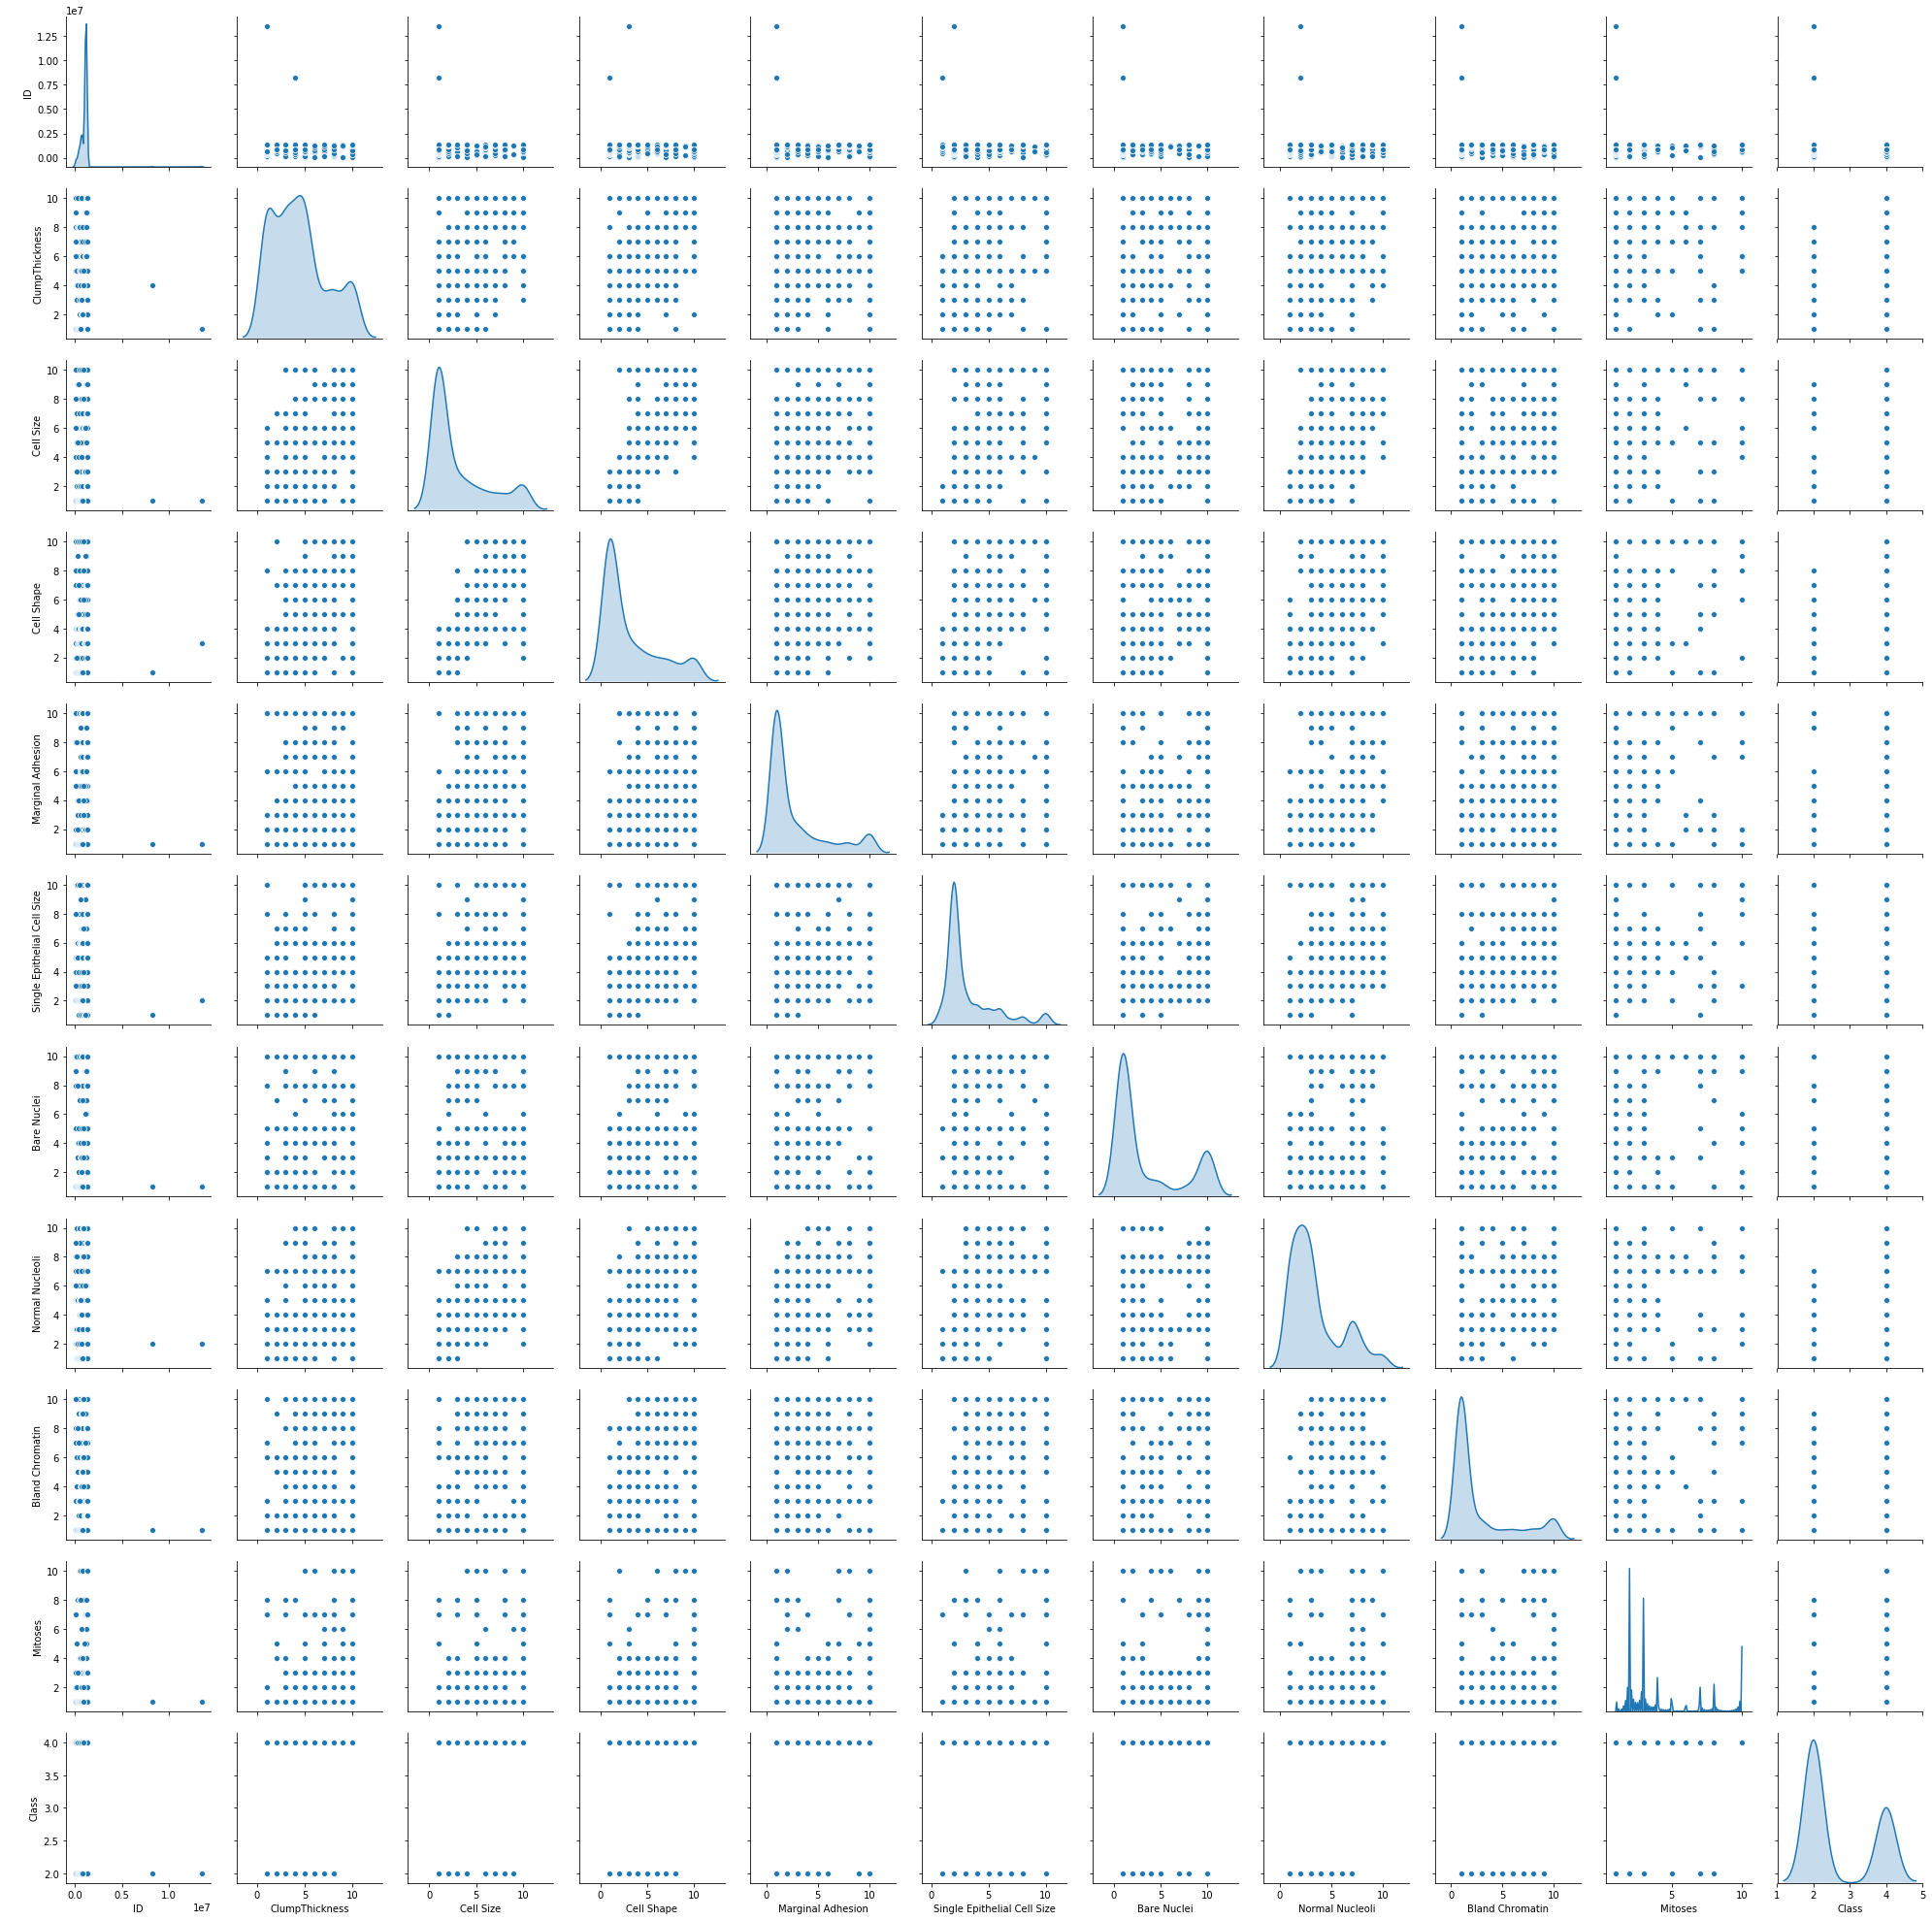

In [117]:
sns.pairplot(Cancer1, diag_kind='kde') 

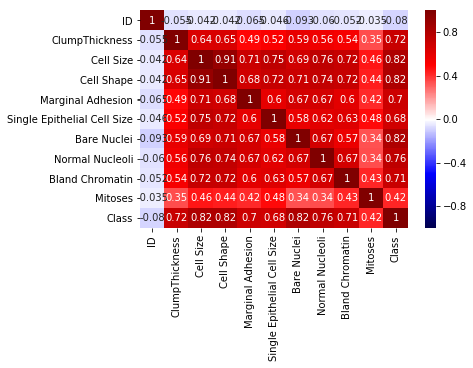

In [118]:
Cancer1.corr()
sns.heatmap(Cancer1.corr(), annot=True, vmin=-1, vmax=1, cmap='seismic')

## Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [136]:
Cancer1 = Cancer1.drop('ID', axis=1)

In [137]:
Cancer1.head(5)

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [159]:
from sklearn.model_selection import train_test_split

independent = Cancer1.iloc[:, :-1].values
dependent = Cancer1.iloc[:, 9].values


X_train, X_test_O, y_train, y_test_O = train_test_split(independent, dependent, test_size=0.30, random_state=1)


print(X_train.shape)
print(X_test_O.shape)
print(y_test_O.shape)

(489, 9)
(210, 9)
(210,)


## Q6 Create a covariance matrix for identifying Principal components

In [139]:
sc = StandardScaler()
X_train_std =  sc.fit_transform(X_train)          
train_cov_matrix = np.cov(X_train_std.T)
print('Covariance Matrix \n%s', train_cov_matrix)

Covariance Matrix 
%s [[ 1.00204918  0.66567241  0.68303668  0.51766685  0.5473968   0.59980405
   0.54902348  0.56063467  0.37977544]
 [ 0.66567241  1.00204918  0.90744823  0.71135907  0.73096251  0.6755228
   0.75495524  0.71146524  0.44284885]
 [ 0.68303668  0.90744823  1.00204918  0.69033881  0.70625629  0.70203072
   0.72483929  0.69355343  0.42748444]
 [ 0.51766685  0.71135907  0.69033881  1.00204918  0.56603551  0.65543481
   0.6429217   0.59196798  0.41411745]
 [ 0.5473968   0.73096251  0.70625629  0.56603551  1.00204918  0.5831137
   0.5835245   0.60364187  0.46836455]
 [ 0.59980405  0.6755228   0.70203072  0.65543481  0.5831137   1.00204918
   0.67766204  0.56928108  0.36578076]
 [ 0.54902348  0.75495524  0.72483929  0.6429217   0.5835245   0.67766204
   1.00204918  0.6559854   0.26985257]
 [ 0.56063467  0.71146524  0.69355343  0.59196798  0.60364187  0.56928108
   0.6559854   1.00204918  0.38596877]
 [ 0.37977544  0.44284885  0.42748444  0.41411745  0.46836455  0.36578076
  

C:\Users\Ravichandra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Ravichandra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## Q7 Identify eigen values and eigen vector

In [140]:
eigenvalues, eigenvectors = np.linalg.eig(train_cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[  3.15255741e-01  -6.83776570e-05  -1.38822160e-02  -8.14996512e-01
   -2.93729981e-01   2.97746762e-01   1.61798289e-01  -9.87225080e-02
   -1.59205928e-01]
 [  3.82453923e-01  -6.48095038e-02  -7.40420491e-01  -1.68901685e-02
    1.70935217e-01  -3.08521159e-01  -9.87410125e-02   3.04007455e-01
   -2.72848804e-01]
 [  3.78893165e-01  -7.78433513e-02   6.54491857e-01  -9.16107964e-02
    8.94066819e-02  -5.07990793e-01  -1.14241374e-01   2.76864237e-01
   -2.40572557e-01]
 [  3.33010171e-01  -3.86941154e-02   4.56740826e-02   5.06767239e-01
   -3.51964855e-01   2.18316662e-01   9.13215983e-02  -3.50886626e-01
   -5.70706013e-01]
 [  3.31981528e-01   1.67350863e-01   5.22048765e-02  -3.69947563e-02
    4.52595818e-01   2.90948294e-01  -6.62414664e-01  -3.47373529e-01
    9.34481299e-02]
 [  3.35870185e-01  -1.46539042e-01  -9.47604497e-02   8.34925578e-02
   -5.47723456e-01  -3.23927190e-01  -1.93370660e-01  -2.28619034e-01
    5.95968367e-01]
 [  3.40626376e-01  -3

##  Q8 Find variance and cumulative variance by each eigen vector

In [141]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
train_eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
train_eig_pairs.sort()

train_eig_pairs.reverse()
print(train_eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
train_eigvalues_sorted = [train_eig_pairs[index][0] for index in range(len(eigenvalues))]
train_eigvectors_sorted = [train_eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %train_eigvalues_sorted)

[(5.847453511169852, array([ 0.31525574,  0.38245392,  0.37889316,  0.33301017,  0.33198153,
        0.33587019,  0.34062638,  0.33236366,  0.22444279])), (0.80953512103529568, array([ -6.83776570e-05,  -6.48095038e-02,  -7.78433513e-02,
        -3.86941154e-02,   1.67350863e-01,  -1.46539042e-01,
        -3.49791616e-01,  -6.69208369e-02,   9.01071766e-01])), (0.5056017416924895, array([-0.81499651, -0.01689017, -0.0916108 ,  0.50676724, -0.03699476,
        0.08349256,  0.21446891,  0.04134862,  0.11934652])), (0.47685620367657766, array([-0.29372998,  0.17093522,  0.08940668, -0.35196486,  0.45259582,
       -0.54772346,  0.032222  ,  0.48204007, -0.11994247])), (0.40112078954797242, array([ 0.16179829, -0.09874101, -0.11424137,  0.0913216 , -0.66241466,
       -0.19337066,  0.08695884,  0.65799608,  0.16116676])), (0.34071651523366475, array([-0.15920593, -0.2728488 , -0.24057256, -0.57070601,  0.09344813,
        0.59596837,  0.28009318,  0.23338062,  0.14070162])), (0.30236122856

## Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [150]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(train_eigvalues_sorted, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 9 entries as there are 9 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%
cum_var_exp


array([ 0.64838839,  0.7381528 ,  0.79421588,  0.84709155,  0.89156939,
        0.92934936,  0.96287635,  0.99016802,  1.        ])

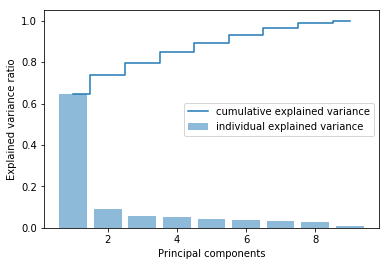

In [155]:
plt.bar(range(1,10), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,10),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()


In [153]:
# P_reduce represents reduced mathematical space....

P_reduce = np.array(train_eigvectors_sorted[1:6])   # Reducing from 9 to 6 dimension space

X_std_4D = np.dot(X_train_std,P_reduce.T)   # projecting original data into principal component dimensions

Proj_data_df = pd.DataFrame(X_std_4D)  # converting array to dataframe for pairplot

In [162]:
#Let us check it visually
Proj_data_Cancer_df = Proj_data_df.join(dependent)

sns.pairplot(Proj_data_Cancer_df, diag_kind='kde') 

AttributeError: 'numpy.int64' object has no attribute 'index'

## Q10 Find correlation between components and features

## SVM

## Q1 Read the input file 'Diabetes.csv' using Pandas and check it's column names(1 Marks)

In [9]:
PDF = pd.read_csv("pima-indians-diabetes (1).csv")

In [ ]:
# Eye ball the imported dataset

### Check dimension of dataset

In [11]:
PDF.shape

(768, 9)

In [13]:
PDF.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Q2 Check distribution of dependent variable, Outcome and plot it (1 Marks)

   Class  count      prop
0      0    500  0.651042
1      1    268  0.348958


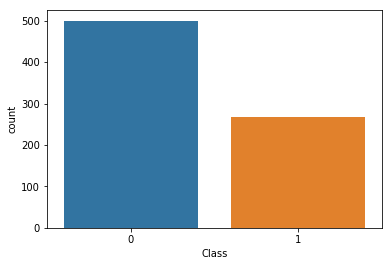

In [14]:
## Target Variable Frequency Distribution
freq = PDF['Class'].value_counts().to_frame()
freq.reset_index(inplace=True)
freq.columns = [freq.columns[1], 'count']
freq['prop'] = freq['count'] / sum(freq['count'])
print (freq)

import seaborn as sns
sns.countplot(PDF['Class'])

### Out of  768 data points, 500 are labeled as 0 and 268 as 1.
### Outcome 0 means No diabetes, outcome 1 means diabetes

In [15]:
PDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Class                       768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Check data types and info of dataset

## Q3 Check data distribution using summary statistics and provide your findings

In [17]:
PDF.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
# Few Insights
# Min blood pressure of 0 is invalid, so impute it with appropriate values. Same with few other variables like BMI
# Mean and Median values of Insuline is very different
# Insuline has very high Standard deviation

## Q4 Do correlation analysis and bivariate viualization with Insights(1 Marks)

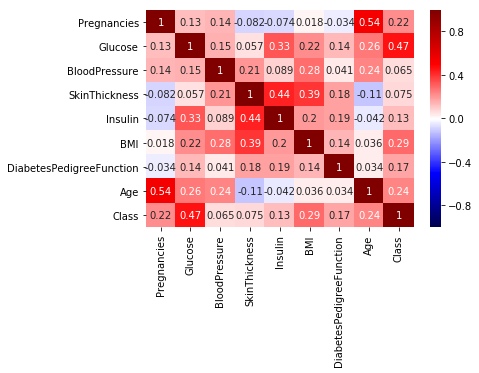

In [21]:
PDF.corr()
sns.heatmap(PDF.corr(), annot=True, vmin=-1, vmax=1, cmap='seismic')

In [ ]:
### positive spurious correlation seen with pregnancies and age (0.54).
### positive spurious correlation seen with glucose and Class (0.47).
### positive spurious correlation seen with BMI and skin thickness (0.44).
### positive spurious correlation seen with Insulin and skin thickness (0.39).

C:\Users\Ravichandra\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Ravichandra\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


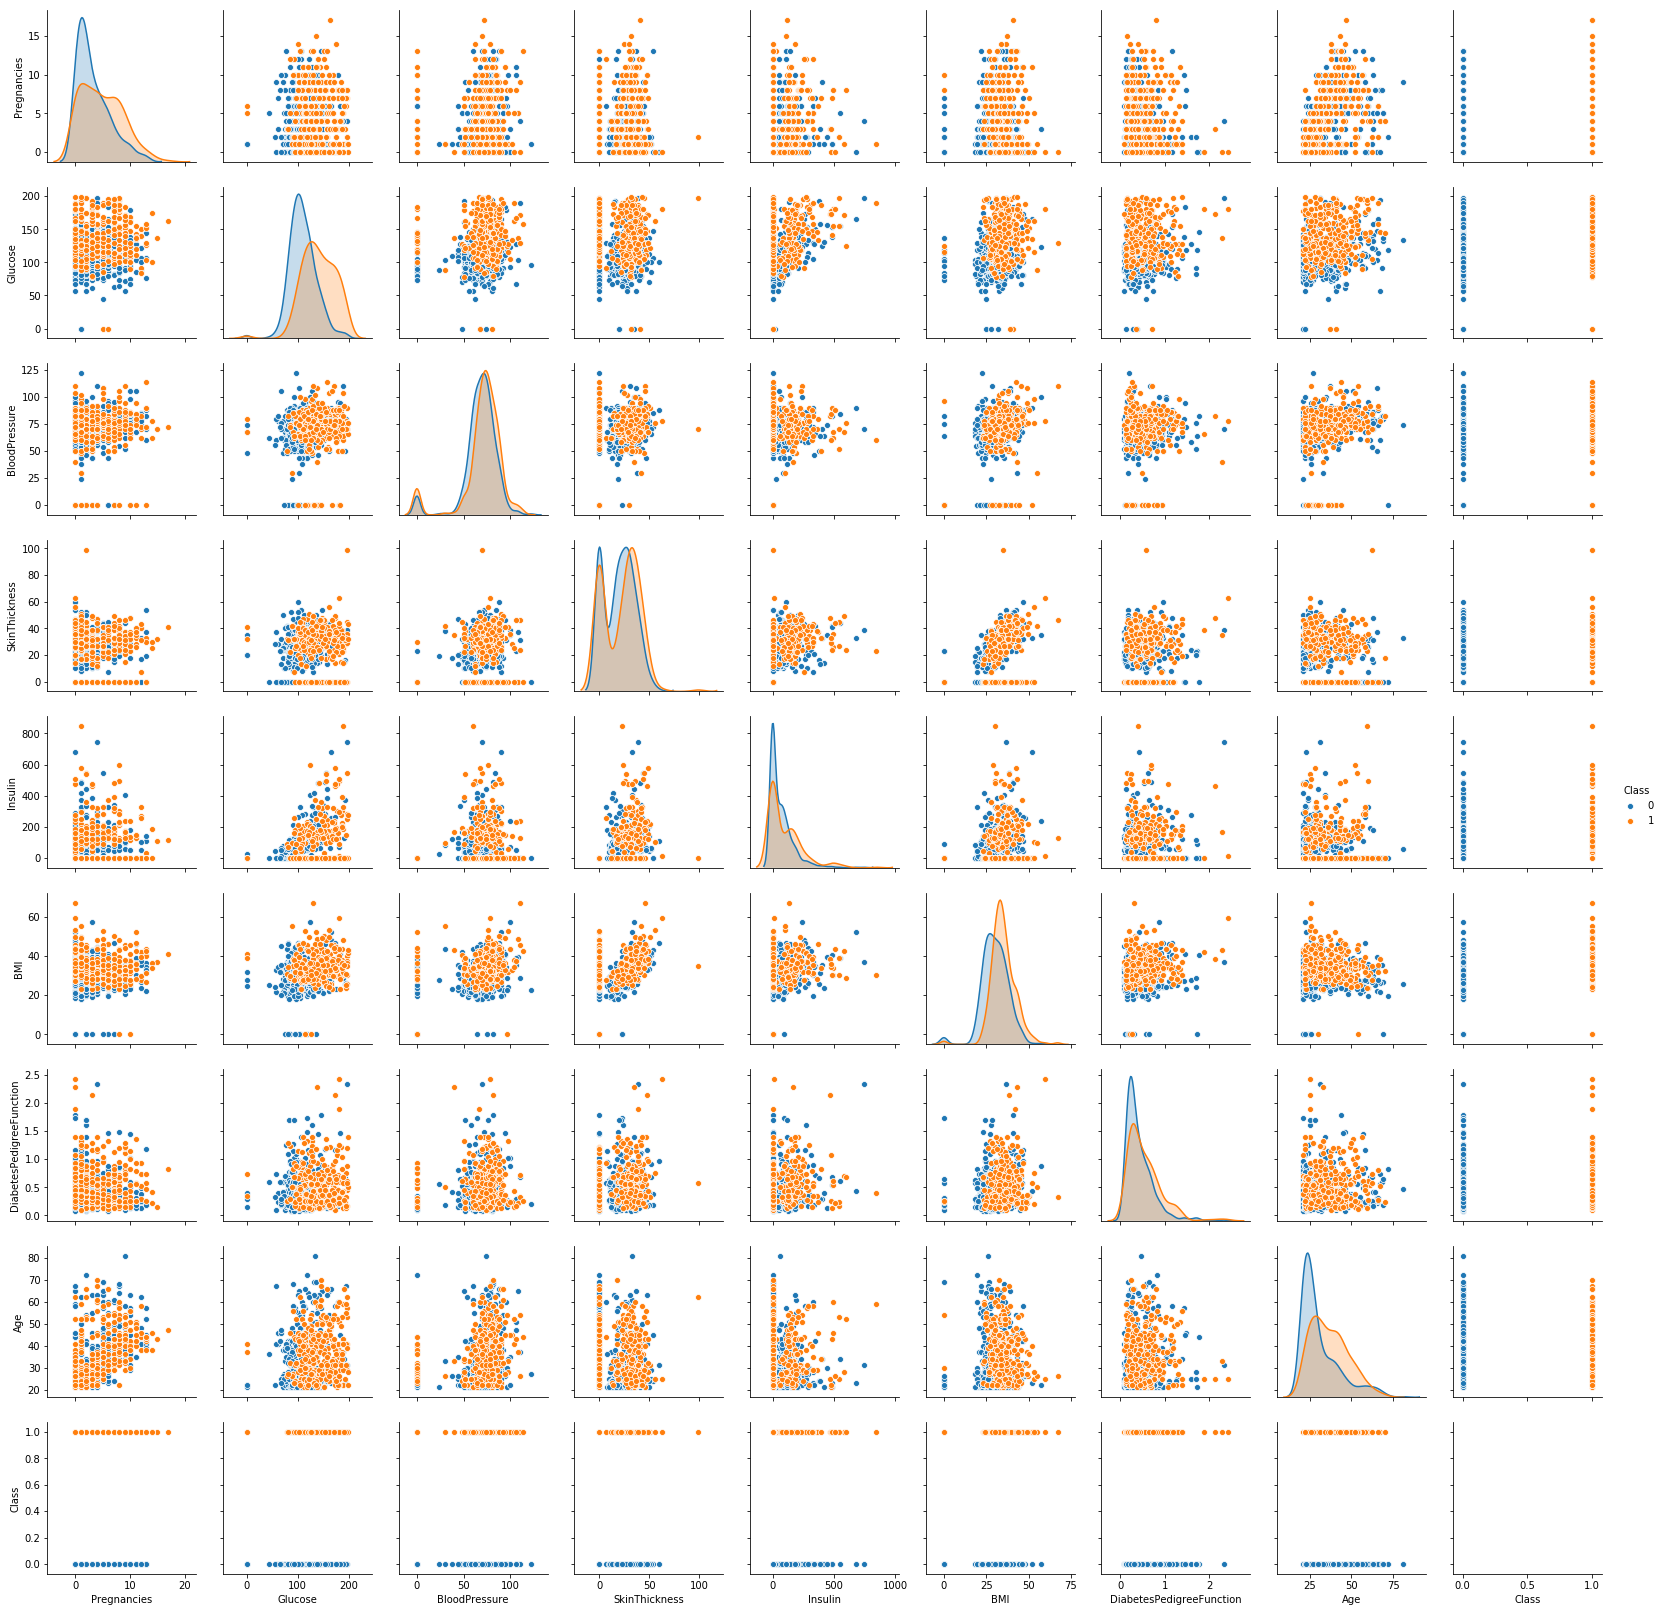

In [20]:
import seaborn as sns
sns.pairplot(PDF, hue = "Class")

In [ ]:
#### some of features show positive linear correlations and doesn't other show any correlations

#### Do train and test split with stratify sampling on Outcome variable to maintain the distribution of dependent variable(1 Marks)

In [29]:
independent = PDF.iloc[:, :-1].values
dependent = PDF.iloc[:, 8].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(independent, dependent, test_size=0.3,random_state=5)


## Q5 Train Support Vector Machine Model(1 Marks)

In [31]:
# use from sklearn.svm import SVC
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.69


In [15]:
# your insights
##Here the Training set shows 100 % accuracy and but when it comes to test accuracy drops to 0.69. Here there is overfitting problem with model.

## Q6 Scale the data points using MinMaxScaler ( 1 Marks)

In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

## Q7 Fit SVM Model on Scale data and give your observation( 1 Marks)

In [33]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.75
Accuracy on test set: 0.76


#we can try increasing either C or gamma to fit a more complex model.

### Try improving the model accuracy using C=1000 (1 Marks)

In [35]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.801
Accuracy on test set: 0.775


### Here, increasing C allows us to improve the model, resulting in ??? accuracy.
### Let's try to explore different Kernel and C (Bonus for practice)

In [36]:
import multiprocessing 
from sklearn.model_selection import GridSearchCV

In [37]:
 param_grid = [    {        
     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],        
     'C': [ 0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0 ]    } ]

In [38]:
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

In [39]:
gs.fit(X_train_scaled, y_train) 

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid=[{'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [40]:
gs.best_estimator_

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [41]:
gs.best_score_ 

0.76722532588454373